<a href="https://colab.research.google.com/github/Ewa-B/NLP-Generate-Poetry-Example/blob/main/Generate_poetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [3]:
shakespear_text = open('sonnets.txt').read()
print(len(shakespear_text))

28893


In [4]:
corpus = shakespear_text.lower().split("\n")
print(corpus)

['i', '', ' from fairest creatures we desire increase,', " that thereby beauty's rose might never die,", ' but as the riper should by time decease,', ' his tender heir might bear his memory:', ' but thou, contracted to thine own bright eyes,', " feed'st thy light's flame with self-substantial fuel,", ' making a famine where abundance lies,', ' thy self thy foe, to thy sweet self too cruel:', " thou that art now the world's fresh ornament,", ' and only herald to the gaudy spring,', ' within thine own bud buriest thy content,', " and tender churl mak'st waste in niggarding:", '   pity the world, or else this glutton be,', "   to eat the world's due, by the grave and thee.", '', ' ii', '', ' when forty winters shall besiege thy brow,', " and dig deep trenches in thy beauty's field,", " thy youth's proud livery so gazed on now,", " will be a tatter'd weed of small worth held:", ' then being asked, where all thy beauty lies,', ' where all the treasure of thy lusty days;', ' to say, within t

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(vocab_size)

In [6]:
input_sequences = []
for sentence in corpus:
    tokens = tokenizer.texts_to_sequences([sentence])[0]
    for i in range(1, len(tokens)):
        n_gram_sequence = tokens[:i+1] # creates an n-gram sequence that includes tokens from the start of the sentence up to the current index i
        input_sequences.append(n_gram_sequence)


In [7]:
max_seq_len = max([len(i) for i in input_sequences])

input_seq_array = np.array(pad_sequences(input_sequences,
                                         maxlen=max_seq_len,
                                         padding='pre') # pre padding becuse the last item will ba a label
                        )

In [8]:
X = input_seq_array[:, :-1]
labels = input_seq_array[:, -1]

y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [ ]:
model = tf.keras.Sequential([
                tf.keras.layers.Embedding(vocab_size, 120, input_length=max_seq_len-1), # -1 becouse last element is reserved as a label
                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(120)),
                tf.keras.layers.Dense(vocab_size, activation='softmax') # vocab_size as a total number of classws we have to precict
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=200, verbose=2)

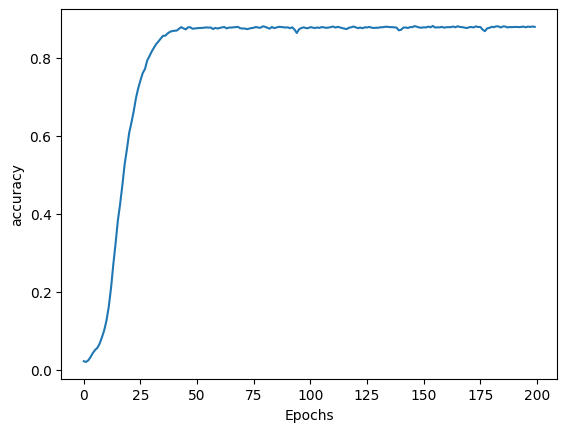

In [10]:
def plot_graph(history, metric):
    plt.plot(history.history[metric])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.show()


plot_graph(history, "accuracy")

In [11]:
seed_text = "The sun is shinning."
next_words = 100

## Run the loop to predict and concatenate the word
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_index = np.argmax(predicted)  # Get the index of the highest probability

    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            output_word = word
            break

    seed_text += " " + output_word

print(seed_text)

The sun is shinning. but the world doth spend had ' eclipses pale flattery sire sire pale hideous civil sire sire pale hear liquid canker wide churl churl alack churl churl user toil first shadow first created told fair shifting shifting muse old old womb done womb speak sessions civil civil stars strength's enemies me your sweet absence give give them it me me now liquid zealous didst present muse staineth give sight enemies churl flattery flattery whose farthest unfair flattery churl churl churl fill'd churl farthest churl winds flattery flattery looks winds churl herd churl strong heavenly pale churl pale churl pale churl
